At 300K and SDS 0.11

R-squared (test set): 0.845290635466995
Mean Squared Error: 0.012758365595155148
Predicted viscosity values for new data:
[3.22931319]
Predicted new viscosity data: [3.22931319]


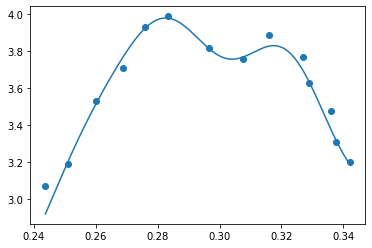

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
# Given data
data = {
    'Temperature': ['300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300'],
    'SDS': ['0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11'],
    'Saline': ['0.2437', '0.2509', '0.2599', '0.2687', '0.2759', '0.2832', '0.2966', '0.3077', '0.3161', '0.327', '0.3288', '0.336', '0.3378', '0.3421'],
    'Viscosity': ['3.07', '3.19', '3.53', '3.71', '3.93', '3.99', '3.82', '3.76', '3.89', '3.77', '3.63', '3.48', '3.311', '3.2']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert columns to numeric types
df['Temperature'] = pd.to_numeric(df['Temperature'])
df['SDS'] = pd.to_numeric(df['SDS'])
df['Saline'] = pd.to_numeric(df['Saline'])
df['Viscosity'] = pd.to_numeric(df['Viscosity'])

# Separate features and target variable
X = df[['Temperature', 'SDS', 'Saline']]
y = df['Viscosity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but can improve SVR performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Regression (SVR)
svr_model = SVR()
# Hyperparameter tuning for SVR
param_grid_svr = {
    'C': [30, 0.01, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['linear','poly', 'rbf']
}
grid_svr = GridSearchCV(svr_model, param_grid_svr, cv=5)
grid_svr.fit(X_train_scaled, y_train)
svr_best_model = grid_svr.best_estimator_

# Evaluate the model on the test set
y_pred = svr_best_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
print(f"R-squared (test set): {r2_test}")
print(f"Mean Squared Error: {mse}")
# Predict new viscosity values for new data (e.g., different combinations of Temperature, SDS, and Saline)
new_data = pd.DataFrame({
    'Temperature': [300],
    'SDS': [0.11],
    'Saline': [0.36]
})

# Scale the new data using the same scaler used for training data
new_data_scaled = scaler.transform(new_data)

# Make predictions on new data
new_predictions = svr_best_model.predict(new_data_scaled)
print("Predicted viscosity values for new data:")
print(new_predictions)
# Convert new data to polynomial features
new_data_poly = scaler.transform(new_data)

# Make predictions on the new data
new_viscosity = svr_best_model.predict(new_data_poly)
print(f"Predicted new viscosity data: {new_viscosity}")

fit_line = np.arange(df.Saline.min(), df.Saline.max(), 0.0001)
new_df = pd.DataFrame({'Saline': fit_line})
data = {'Temperature': 300, 'SDS': 0.11}
new_df = new_df.assign(**data)
new_df_features = scaler.transform(new_df[['Temperature', 'SDS', 'Saline']])
new_viscosity_2 = svr_best_model.predict(new_df_features)
plt.plot(new_df['Saline'], new_viscosity_2)
plt.scatter(df.Saline, df.Viscosity)
plt.show()

At 340K and SDS 0.11

R-squared (test set): 0.6821295423147038
Mean Squared Error: 0.02392504978177999
Predicted viscosity values for new data:
[3.11211581]
Predicted new viscosity data: [3.11211581]


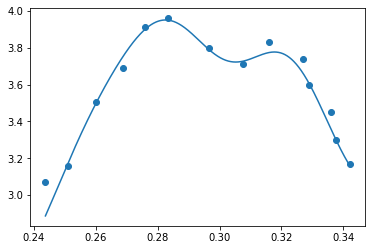

In [24]:
# Given data
data = {
    'Temperature': ['330', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300'],
    'SDS': ['0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11'],
    'Saline': ['0.2437', '0.2509', '0.2599', '0.2687', '0.2759', '0.2832', '0.2966', '0.3077', '0.3161', '0.327', '0.3288', '0.336', '0.3378', '0.3421'],
    'Viscosity': ['3.07', '3.16', '3.503', '3.69', '3.91', '3.96', '3.80', '3.71', '3.83', '3.74', '3.60', '3.45', '3.30', '3.17']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert columns to numeric types
df['Temperature'] = pd.to_numeric(df['Temperature'])
df['SDS'] = pd.to_numeric(df['SDS'])
df['Saline'] = pd.to_numeric(df['Saline'])
df['Viscosity'] = pd.to_numeric(df['Viscosity'])

# Separate features and target variable
X = df[['Temperature', 'SDS', 'Saline']]
y = df['Viscosity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but can improve SVR performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Regression (SVR)
svr_model = SVR()
# Hyperparameter tuning for SVR
param_grid_svr = {
    'C': [30, 0.01, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['rbf']
}
grid_svr = GridSearchCV(svr_model, param_grid_svr, cv=5)
grid_svr.fit(X_train_scaled, y_train)
svr_best_model = grid_svr.best_estimator_

# Evaluate the model on the test set
y_pred = svr_best_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
print(f"R-squared (test set): {r2_test}")
print(f"Mean Squared Error: {mse}")
# Predict new viscosity values for new data (e.g., different combinations of Temperature, SDS, and Saline)
new_data = pd.DataFrame({
    'Temperature': [300],
    'SDS': [0.11],
    'Saline': [0.36]
})

# Scale the new data using the same scaler used for training data
new_data_scaled = scaler.transform(new_data)

# Make predictions on new data
new_predictions = svr_best_model.predict(new_data_scaled)
print("Predicted viscosity values for new data:")
print(new_predictions)
# Convert new data to polynomial features
new_data_poly = scaler.transform(new_data)

# Make predictions on the new data
new_viscosity = svr_best_model.predict(new_data_poly)
print(f"Predicted new viscosity data: {new_viscosity}")

fit_line = np.arange(df.Saline.min(), df.Saline.max(), 0.0001)
new_df = pd.DataFrame({'Saline': fit_line})
data = {'Temperature': 300, 'SDS': 0.11}
new_df = new_df.assign(**data)
new_df_features = scaler.transform(new_df[['Temperature', 'SDS', 'Saline']])
new_viscosity_2 = svr_best_model.predict(new_df_features)
plt.plot(new_df['Saline'], new_viscosity_2)
plt.scatter(df.Saline, df.Viscosity)
plt.show()

at 380K and SDS 0.11

R-squared (test set): 0.6120554068206097
Mean Squared Error: 0.028095809537147392
Predicted viscosity values for new data:
[2.71543085]
Predicted new viscosity data: [2.71543085]


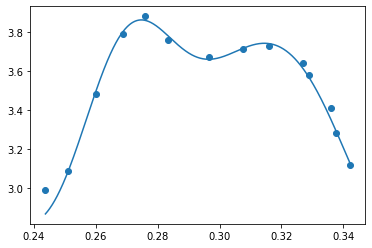

In [25]:
# Given data
data = {
    'Temperature': ['330', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300'],
    'SDS': ['0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11'],
    'Saline': ['0.2437', '0.2509', '0.2599', '0.2687', '0.2759', '0.2832', '0.2966', '0.3077', '0.3161', '0.327', '0.3288', '0.336', '0.3378', '0.3421'],
    'Viscosity': ['2.99', '3.09', '3.4803', '3.79', '3.88', '3.76', '3.67', '3.71', '3.73', '3.64', '3.580', '3.41', '3.280', '3.12']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert columns to numeric types
df['Temperature'] = pd.to_numeric(df['Temperature'])
df['SDS'] = pd.to_numeric(df['SDS'])
df['Saline'] = pd.to_numeric(df['Saline'])
df['Viscosity'] = pd.to_numeric(df['Viscosity'])

# Separate features and target variable
X = df[['Temperature', 'SDS', 'Saline']]
y = df['Viscosity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but can improve SVR performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Regression (SVR)
svr_model = SVR()
# Hyperparameter tuning for SVR
param_grid_svr = {
    'C': [30, 0.01, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['rbf']
}
grid_svr = GridSearchCV(svr_model, param_grid_svr, cv=5)
grid_svr.fit(X_train_scaled, y_train)
svr_best_model = grid_svr.best_estimator_

# Evaluate the model on the test set
y_pred = svr_best_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
print(f"R-squared (test set): {r2_test}")
print(f"Mean Squared Error: {mse}")
# Predict new viscosity values for new data (e.g., different combinations of Temperature, SDS, and Saline)
new_data = pd.DataFrame({
    'Temperature': [300],
    'SDS': [0.11],
    'Saline': [0.36]
})

# Scale the new data using the same scaler used for training data
new_data_scaled = scaler.transform(new_data)

# Make predictions on new data
new_predictions = svr_best_model.predict(new_data_scaled)
print("Predicted viscosity values for new data:")
print(new_predictions)
# Convert new data to polynomial features
new_data_poly = scaler.transform(new_data)

# Make predictions on the new data
new_viscosity = svr_best_model.predict(new_data_poly)
print(f"Predicted new viscosity data: {new_viscosity}")

fit_line = np.arange(df.Saline.min(), df.Saline.max(), 0.0001)
new_df = pd.DataFrame({'Saline': fit_line})
data = {'Temperature': 300, 'SDS': 0.11}
new_df = new_df.assign(**data)
new_df_features = scaler.transform(new_df[['Temperature', 'SDS', 'Saline']])
new_viscosity_2 = svr_best_model.predict(new_df_features)
plt.plot(new_df['Saline'], new_viscosity_2)
plt.scatter(df.Saline, df.Viscosity)
plt.show()

At 420K and SDS 0.11

R-squared (test set): 0.5366499624988497
Mean Squared Error: 0.04302977348260683
Predicted viscosity values for new data:
[2.59873875]
Predicted new viscosity data: [2.59873875]


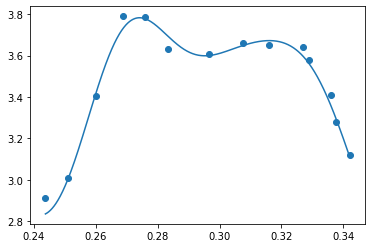

In [26]:
# Given data
data = {
    'Temperature': ['330', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300'],
    'SDS': ['0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11'],
    'Saline': ['0.2437', '0.2509', '0.2599', '0.2687', '0.2759', '0.2832', '0.2966', '0.3077', '0.3161', '0.327', '0.3288', '0.336', '0.3378', '0.3421'],
    'Viscosity': ['2.91', '3.01', '3.403', '3.79', '3.788', '3.63', '3.61', '3.659', '3.65', '3.64', '3.580', '3.41', '3.280', '3.12']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert columns to numeric types
df['Temperature'] = pd.to_numeric(df['Temperature'])
df['SDS'] = pd.to_numeric(df['SDS'])
df['Saline'] = pd.to_numeric(df['Saline'])
df['Viscosity'] = pd.to_numeric(df['Viscosity'])

# Separate features and target variable
X = df[['Temperature', 'SDS', 'Saline']]
y = df['Viscosity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but can improve SVR performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Regression (SVR)
svr_model = SVR()
# Hyperparameter tuning for SVR
param_grid_svr = {
    'C': [30, 0.01, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['rbf']
}
grid_svr = GridSearchCV(svr_model, param_grid_svr, cv=5)
grid_svr.fit(X_train_scaled, y_train)
svr_best_model = grid_svr.best_estimator_

# Evaluate the model on the test set
y_pred = svr_best_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
print(f"R-squared (test set): {r2_test}")
print(f"Mean Squared Error: {mse}")
# Predict new viscosity values for new data (e.g., different combinations of Temperature, SDS, and Saline)
new_data = pd.DataFrame({
    'Temperature': [300],
    'SDS': [0.11],
    'Saline': [0.36]
})

# Scale the new data using the same scaler used for training data
new_data_scaled = scaler.transform(new_data)

# Make predictions on new data
new_predictions = svr_best_model.predict(new_data_scaled)
print("Predicted viscosity values for new data:")
print(new_predictions)
# Convert new data to polynomial features
new_data_poly = scaler.transform(new_data)

# Make predictions on the new data
new_viscosity = svr_best_model.predict(new_data_poly)
print(f"Predicted new viscosity data: {new_viscosity}")

fit_line = np.arange(df.Saline.min(), df.Saline.max(), 0.0001)
new_df = pd.DataFrame({'Saline': fit_line})
data = {'Temperature': 300, 'SDS': 0.11}
new_df = new_df.assign(**data)
new_df_features = scaler.transform(new_df[['Temperature', 'SDS', 'Saline']])
new_viscosity_2 = svr_best_model.predict(new_df_features)
plt.plot(new_df['Saline'], new_viscosity_2)
plt.scatter(df.Saline, df.Viscosity)
plt.show()

At 460K and SDS 0.11

R-squared (test set): 0.5692992734193338
Mean Squared Error: 0.03732739630365771
Predicted viscosity values for new data:
[2.55102771]
Predicted new viscosity data: [2.55102771]


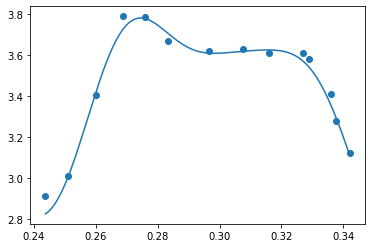

In [27]:
# Given data
data = {
    'Temperature': ['330', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300'],
    'SDS': ['0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11'],
    'Saline': ['0.2437', '0.2509', '0.2599', '0.2687', '0.2759', '0.2832', '0.2966', '0.3077', '0.3161', '0.327', '0.3288', '0.336', '0.3378', '0.3421'],
    'Viscosity': ['2.91', '3.01', '3.403', '3.79', '3.788', '3.67', '3.62', '3.629', '3.61', '3.61', '3.580', '3.41', '3.280', '3.12']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert columns to numeric types
df['Temperature'] = pd.to_numeric(df['Temperature'])
df['SDS'] = pd.to_numeric(df['SDS'])
df['Saline'] = pd.to_numeric(df['Saline'])
df['Viscosity'] = pd.to_numeric(df['Viscosity'])

# Separate features and target variable
X = df[['Temperature', 'SDS', 'Saline']]
y = df['Viscosity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but can improve SVR performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Regression (SVR)
svr_model = SVR()
# Hyperparameter tuning for SVR
param_grid_svr = {
    'C': [30, 0.01, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['rbf']
}
grid_svr = GridSearchCV(svr_model, param_grid_svr, cv=5)
grid_svr.fit(X_train_scaled, y_train)
svr_best_model = grid_svr.best_estimator_

# Evaluate the model on the test set
y_pred = svr_best_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
print(f"R-squared (test set): {r2_test}")
print(f"Mean Squared Error: {mse}")
# Predict new viscosity values for new data (e.g., different combinations of Temperature, SDS, and Saline)
new_data = pd.DataFrame({
    'Temperature': [300],
    'SDS': [0.11],
    'Saline': [0.36]
})

# Scale the new data using the same scaler used for training data
new_data_scaled = scaler.transform(new_data)

# Make predictions on new data
new_predictions = svr_best_model.predict(new_data_scaled)
print("Predicted viscosity values for new data:")
print(new_predictions)
# Convert new data to polynomial features
new_data_poly = scaler.transform(new_data)

# Make predictions on the new data
new_viscosity = svr_best_model.predict(new_data_poly)
print(f"Predicted new viscosity data: {new_viscosity}")

fit_line = np.arange(df.Saline.min(), df.Saline.max(), 0.0001)
new_df = pd.DataFrame({'Saline': fit_line})
data = {'Temperature': 300, 'SDS': 0.11}
new_df = new_df.assign(**data)
new_df_features = scaler.transform(new_df[['Temperature', 'SDS', 'Saline']])
new_viscosity_2 = svr_best_model.predict(new_df_features)
plt.plot(new_df['Saline'], new_viscosity_2)
plt.scatter(df.Saline, df.Viscosity)
plt.show()

At 300K and SDS 0.15

R-squared (test set): 0.9894806338403063
Mean Squared Error: 0.0011978051600504541
Predicted viscosity values for new data:
[4.19976573]
Predicted new viscosity data: [4.19976573]


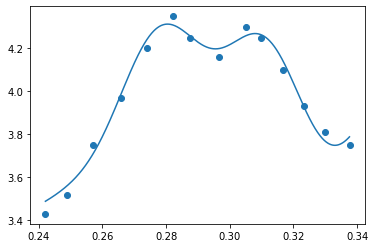

In [28]:
# Given data
data = {
    'Temperature': ['300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300'],
    'SDS': ['0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15'],
    'Saline': ['0.2421', '0.2489', '0.2571', '0.2657', '0.2739', '0.2822', '0.2876', '0.2967', '0.305', '0.3099', '0.3168', '0.3233', '0.3298', '0.3377'],
    'Viscosity': ['3.43', '3.52', '3.75', '3.971', '4.2', '4.35', '4.25', '4.16', '4.3', '4.25', '4.1', '3.93', '3.811', '3.75']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert columns to numeric types
df['Temperature'] = pd.to_numeric(df['Temperature'])
df['SDS'] = pd.to_numeric(df['SDS'])
df['Saline'] = pd.to_numeric(df['Saline'])
df['Viscosity'] = pd.to_numeric(df['Viscosity'])

# Separate features and target variable
X = df[['Temperature', 'SDS', 'Saline']]
y = df['Viscosity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but can improve SVR performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Regression (SVR)
svr_model = SVR()
# Hyperparameter tuning for SVR
param_grid_svr = {
    'C': [65, 0.01, 10],
    'epsilon': [0.001, 0.1, 0.04],
    'kernel': ['poly','rbf']
}
grid_svr = GridSearchCV(svr_model, param_grid_svr, cv=5)
grid_svr.fit(X_train_scaled, y_train)
svr_best_model = grid_svr.best_estimator_

# Evaluate the model on the test set
y_pred = svr_best_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
print(f"R-squared (test set): {r2_test}")
print(f"Mean Squared Error: {mse}")
# Predict new viscosity values for new data (e.g., different combinations of Temperature, SDS, and Saline)
new_data = pd.DataFrame({
    'Temperature': [300],
    'SDS': [0.11],
    'Saline': [0.2967]
})

# Scale the new data using the same scaler used for training data
new_data_scaled = scaler.transform(new_data)

# Make predictions on new data
new_predictions = svr_best_model.predict(new_data_scaled)
print("Predicted viscosity values for new data:")
print(new_predictions)
# Convert new data to polynomial features
new_data_poly = scaler.transform(new_data)

# Make predictions on the new data
new_viscosity = svr_best_model.predict(new_data_poly)
print(f"Predicted new viscosity data: {new_viscosity}")

fit_line = np.arange(df.Saline.min(), df.Saline.max(), 0.0001)
new_df = pd.DataFrame({'Saline': fit_line})
data = {'Temperature': 300, 'SDS': 0.11}
new_df = new_df.assign(**data)
new_df_features = scaler.transform(new_df[['Temperature', 'SDS', 'Saline']])
new_viscosity_2 = svr_best_model.predict(new_df_features)
plt.plot(new_df['Saline'], new_viscosity_2)
plt.scatter(df.Saline, df.Viscosity)
plt.show()

AT 340K and SDS 0.15

R-squared (test set): 0.9773093248449569
Mean Squared Error: 0.0025069615962020407
Predicted viscosity values for new data:
[4.11983176]
Predicted new viscosity data: [4.11983176]


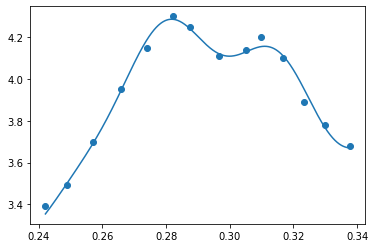

In [29]:
# Given data
data = {
    'SDS': ['0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15'],
    'Saline': ['0.2421', '0.2489', '0.2571', '0.2657', '0.2739', '0.2822', '0.2876', '0.2967', '0.305', '0.3099', '0.3168', '0.3233', '0.3298', '0.3377'],
    'Viscosity': ['3.393', '3.49', '3.70', '3.95', '4.15', '4.3', '4.25', '4.11', '4.14', '4.20', '4.1', '3.89', '3.78', '3.68']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert columns to numeric types
#df['Temperature'] = pd.to_numeric(df['Temperature'])
df['SDS'] = pd.to_numeric(df['SDS'])
df['Saline'] = pd.to_numeric(df['Saline'])
df['Viscosity'] = pd.to_numeric(df['Viscosity'])

# Separate features and target variable
X = df[['SDS', 'Saline']]
y = df['Viscosity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but can improve SVR performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Regression (SVR)
svr_model = SVR()
# Hyperparameter tuning for SVR
param_grid_svr = {
    'C': [65, 0.01, 10],
    'epsilon': [0.01, 0.1, 0.03],
    'kernel': ['poly','rbf']
}
grid_svr = GridSearchCV(svr_model, param_grid_svr, cv=5)
grid_svr.fit(X_train_scaled, y_train)
svr_best_model = grid_svr.best_estimator_

# Evaluate the model on the test set
y_pred = svr_best_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
print(f"R-squared (test set): {r2_test}")
print(f"Mean Squared Error: {mse}")
# Predict new viscosity values for new data (e.g., different combinations of Temperature, SDS, and Saline)
new_data = pd.DataFrame({
    'SDS': [0.11],
    'Saline': [0.2967]
})

# Scale the new data using the same scaler used for training data
new_data_scaled = scaler.transform(new_data)

# Make predictions on new data
new_predictions = svr_best_model.predict(new_data_scaled)
print("Predicted viscosity values for new data:")
print(new_predictions)
# Convert new data to polynomial features
new_data_poly = scaler.transform(new_data)

# Make predictions on the new data
new_viscosity = svr_best_model.predict(new_data_poly)
print(f"Predicted new viscosity data: {new_viscosity}")

fit_line = np.arange(df.Saline.min(), df.Saline.max(), 0.0001)
new_df = pd.DataFrame({'Saline': fit_line})
data = {'Temperature': 300, 'SDS': 0.11}
new_df = new_df.assign(**data)
new_df_features = scaler.transform(new_df[['SDS', 'Saline']])
new_viscosity_2 = svr_best_model.predict(new_df_features)
plt.plot(new_df['Saline'], new_viscosity_2)
plt.scatter(df.Saline, df.Viscosity)
plt.show()

At 380K and SDS 0.15

R-squared (test set): 0.9656357794199218
Mean Squared Error: 0.0030200727979530534
Predicted viscosity values for new data:
[4.04205544]
Predicted new viscosity data: [4.04205544]


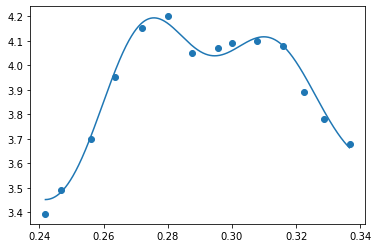

In [30]:
# Given data
data = {
    'SDS': ['0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15'],
    'Saline': ['0.2419', '0.2469', '0.2561', '0.2637', '0.2719', '0.2802', '0.2876', '0.2955', '0.300', '0.3079', '0.3158', '0.3223', '0.3288', '0.3367'],
    'Viscosity': ['3.393', '3.49', '3.70', '3.95', '4.15', '4.2', '4.05', '4.07', '4.09', '4.1', '4.08', '3.89', '3.78', '3.68']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert columns to numeric types
#df['Temperature'] = pd.to_numeric(df['Temperature'])
df['SDS'] = pd.to_numeric(df['SDS'])
df['Saline'] = pd.to_numeric(df['Saline'])
df['Viscosity'] = pd.to_numeric(df['Viscosity'])

# Separate features and target variable
X = df[['SDS', 'Saline']]
y = df['Viscosity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but can improve SVR performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Regression (SVR)
svr_model = SVR()
# Hyperparameter tuning for SVR
param_grid_svr = {
    'C': [65, 0.01, 10],
    'epsilon': [0.01, 0.1, 0.03],
    'kernel': ['poly','rbf']
}
grid_svr = GridSearchCV(svr_model, param_grid_svr, cv=5)
grid_svr.fit(X_train_scaled, y_train)
svr_best_model = grid_svr.best_estimator_

# Evaluate the model on the test set
y_pred = svr_best_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
print(f"R-squared (test set): {r2_test}")
print(f"Mean Squared Error: {mse}")
# Predict new viscosity values for new data (e.g., different combinations of Temperature, SDS, and Saline)
new_data = pd.DataFrame({
    'SDS': [0.11],
    'Saline': [0.2967]
})

# Scale the new data using the same scaler used for training data
new_data_scaled = scaler.transform(new_data)

# Make predictions on new data
new_predictions = svr_best_model.predict(new_data_scaled)
print("Predicted viscosity values for new data:")
print(new_predictions)
# Convert new data to polynomial features
new_data_poly = scaler.transform(new_data)

# Make predictions on the new data
new_viscosity = svr_best_model.predict(new_data_poly)
print(f"Predicted new viscosity data: {new_viscosity}")

fit_line = np.arange(df.Saline.min(), df.Saline.max(), 0.0001)
new_df = pd.DataFrame({'Saline': fit_line})
data = {'Temperature': 300, 'SDS': 0.11}
new_df = new_df.assign(**data)
new_df_features = scaler.transform(new_df[['SDS', 'Saline']])
new_viscosity_2 = svr_best_model.predict(new_df_features)
plt.plot(new_df['Saline'], new_viscosity_2)
plt.scatter(df.Saline, df.Viscosity)
plt.show()

At 420K and SDS 0.15

R-squared (test set): 0.9974027883924925
Mean Squared Error: 0.00016380844471803357
Predicted viscosity values for new data:
[3.97541549]
Predicted new viscosity data: [3.97541549]


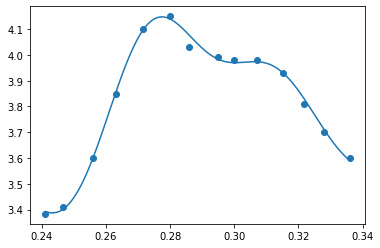

In [31]:
# Given data
data = {
    'SDS': ['0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15'],
    'Saline': ['0.2411', '0.2465', '0.2558', '0.2632', '0.2714', '0.2800', '0.2860', '0.2950', '0.300', '0.3072', '0.3152', '0.3218', '0.328', '0.336'],
    'Viscosity': ['3.383', '3.41', '3.60', '3.85', '4.1', '4.15', '4.03', '3.99', '3.98', '3.98', '3.93', '3.81', '3.7', '3.6']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert columns to numeric types
#df['Temperature'] = pd.to_numeric(df['Temperature'])
df['SDS'] = pd.to_numeric(df['SDS'])
df['Saline'] = pd.to_numeric(df['Saline'])
df['Viscosity'] = pd.to_numeric(df['Viscosity'])

# Separate features and target variable
X = df[['SDS', 'Saline']]
y = df['Viscosity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but can improve SVR performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Regression (SVR)
svr_model = SVR()
# Hyperparameter tuning for SVR
param_grid_svr = {
    'C': [65, 0.01, 10],
    'epsilon': [0.01, 0.1, 0.03],
    'kernel': ['poly','rbf']
}
grid_svr = GridSearchCV(svr_model, param_grid_svr, cv=5)
grid_svr.fit(X_train_scaled, y_train)
svr_best_model = grid_svr.best_estimator_

# Evaluate the model on the test set
y_pred = svr_best_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
print(f"R-squared (test set): {r2_test}")
print(f"Mean Squared Error: {mse}")
# Predict new viscosity values for new data (e.g., different combinations of Temperature, SDS, and Saline)
new_data = pd.DataFrame({
    'SDS': [0.11],
    'Saline': [0.2967]
})

# Scale the new data using the same scaler used for training data
new_data_scaled = scaler.transform(new_data)

# Make predictions on new data
new_predictions = svr_best_model.predict(new_data_scaled)
print("Predicted viscosity values for new data:")
print(new_predictions)
# Convert new data to polynomial features
new_data_poly = scaler.transform(new_data)

# Make predictions on the new data
new_viscosity = svr_best_model.predict(new_data_poly)
print(f"Predicted new viscosity data: {new_viscosity}")

fit_line = np.arange(df.Saline.min(), df.Saline.max(), 0.0001)
new_df = pd.DataFrame({'Saline': fit_line})
data = {'Temperature': 300, 'SDS': 0.11}
new_df = new_df.assign(**data)
new_df_features = scaler.transform(new_df[['SDS', 'Saline']])
new_viscosity_2 = svr_best_model.predict(new_df_features)
plt.plot(new_df['Saline'], new_viscosity_2)
plt.scatter(df.Saline, df.Viscosity)
plt.show()

At 460K and SDS 0.15

R-squared (test set): 0.9198941345556424
Mean Squared Error: 0.002898034397439108
Predicted viscosity values for new data:
[3.96322289]
Predicted new viscosity data: [3.96322289]


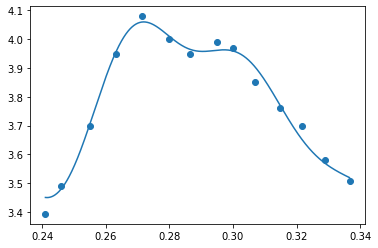

In [32]:
# Given data
data = {
    'SDS': ['0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15', '0.15'],
    'Saline': ['0.2410', '0.2460', '0.2551', '0.2631', '0.2715', '0.2800', '0.2866', '0.2950', '0.300', '0.3069', '0.3148', '0.3218', '0.3288', '0.3367'],
    'Viscosity': ['3.393', '3.49', '3.70', '3.95', '4.08', '4.00', '3.95', '3.99', '3.97', '3.85', '3.76', '3.70', '3.58', '3.508']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert columns to numeric types
#df['Temperature'] = pd.to_numeric(df['Temperature'])
df['SDS'] = pd.to_numeric(df['SDS'])
df['Saline'] = pd.to_numeric(df['Saline'])
df['Viscosity'] = pd.to_numeric(df['Viscosity'])

# Separate features and target variable
X = df[['SDS', 'Saline']]
y = df['Viscosity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but can improve SVR performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Regression (SVR)
svr_model = SVR()
# Hyperparameter tuning for SVR
param_grid_svr = {
    'C': [65, 0.01, 10],
    'epsilon': [0.01, 0.1, 0.03],
    'kernel': ['poly','rbf']
}
grid_svr = GridSearchCV(svr_model, param_grid_svr, cv=5)
grid_svr.fit(X_train_scaled, y_train)
svr_best_model = grid_svr.best_estimator_

# Evaluate the model on the test set
y_pred = svr_best_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
print(f"R-squared (test set): {r2_test}")
print(f"Mean Squared Error: {mse}")
# Predict new viscosity values for new data (e.g., different combinations of Temperature, SDS, and Saline)
new_data = pd.DataFrame({
    'SDS': [0.11],
    'Saline': [0.2967]
})

# Scale the new data using the same scaler used for training data
new_data_scaled = scaler.transform(new_data)

# Make predictions on new data
new_predictions = svr_best_model.predict(new_data_scaled)
print("Predicted viscosity values for new data:")
print(new_predictions)
# Convert new data to polynomial features
new_data_poly = scaler.transform(new_data)

# Make predictions on the new data
new_viscosity = svr_best_model.predict(new_data_poly)
print(f"Predicted new viscosity data: {new_viscosity}")

fit_line = np.arange(df.Saline.min(), df.Saline.max(), 0.0001)
new_df = pd.DataFrame({'Saline': fit_line})
data = {'Temperature': 300, 'SDS': 0.11}
new_df = new_df.assign(**data)
new_df_features = scaler.transform(new_df[['SDS', 'Saline']])
new_viscosity_2 = svr_best_model.predict(new_df_features)
plt.plot(new_df['Saline'], new_viscosity_2)
plt.scatter(df.Saline, df.Viscosity)
plt.show()

At 300K and SDS 0.18

R-squared (test set): 0.975106872975605
Mean Squared Error: 0.0021458373357568917
Predicted viscosity values for new data:
[4.08569808]
Predicted new viscosity data: [4.08569808]


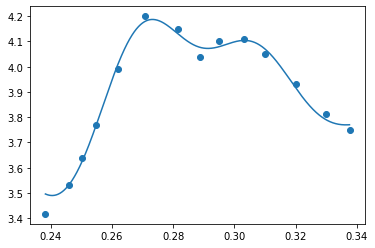

In [33]:
# Given data
data = {
    'Temperature': ['300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300'],
    'SDS': ['0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11'],
    'Saline': ['0.2383', '0.2459', '0.2501', '0.2548', '0.262', '0.2708', '0.2816', '0.2889', '0.295', '0.303', '0.31', '0.32', '0.3298', '0.3377'],
    'Viscosity': ['3.417', '3.53', '3.64', '3.771', '3.99', '4.2', '4.15', '4.04', '4.1', '4.11', '4.05', '3.93', '3.811', '3.75']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert columns to numeric types
df['Temperature'] = pd.to_numeric(df['Temperature'])
df['SDS'] = pd.to_numeric(df['SDS'])
df['Saline'] = pd.to_numeric(df['Saline'])
df['Viscosity'] = pd.to_numeric(df['Viscosity'])

# Separate features and target variable
X = df[['Temperature', 'SDS', 'Saline']]
y = df['Viscosity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but can improve SVR performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Regression (SVR)
svr_model = SVR()
# Hyperparameter tuning for SVR
param_grid_svr = {
    'C': [80, 0.01, 10],
    'epsilon': [0.001, 5, 0.02],
    'kernel': ['poly','rbf']
}
grid_svr = GridSearchCV(svr_model, param_grid_svr, cv=5)
grid_svr.fit(X_train_scaled, y_train)
svr_best_model = grid_svr.best_estimator_

# Evaluate the model on the test set
y_pred = svr_best_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
print(f"R-squared (test set): {r2_test}")
print(f"Mean Squared Error: {mse}")
# Predict new viscosity values for new data (e.g., different combinations of Temperature, SDS, and Saline)
new_data = pd.DataFrame({
    'Temperature': [300],
    'SDS': [0.11],
    'Saline': [0.2967]
})

# Scale the new data using the same scaler used for training data
new_data_scaled = scaler.transform(new_data)

# Make predictions on new data
new_predictions = svr_best_model.predict(new_data_scaled)
print("Predicted viscosity values for new data:")
print(new_predictions)
# Convert new data to polynomial features
new_data_poly = scaler.transform(new_data)

# Make predictions on the new data
new_viscosity = svr_best_model.predict(new_data_poly)
print(f"Predicted new viscosity data: {new_viscosity}")

fit_line = np.arange(df.Saline.min(), df.Saline.max(), 0.0001)
new_df = pd.DataFrame({'Saline': fit_line})
data = {'Temperature': 300, 'SDS': 0.11}
new_df = new_df.assign(**data)
new_df_features = scaler.transform(new_df[['Temperature', 'SDS', 'Saline']])
new_viscosity_2 = svr_best_model.predict(new_df_features)
plt.plot(new_df['Saline'], new_viscosity_2)
plt.scatter(df.Saline, df.Viscosity)
plt.show()

At 340K and SDS 0.18

R-squared (test set): 0.9826597058689859
Mean Squared Error: 0.0013354916529902696
Predicted viscosity values for new data:
[4.01734424]
Predicted new viscosity data: [4.01734424]


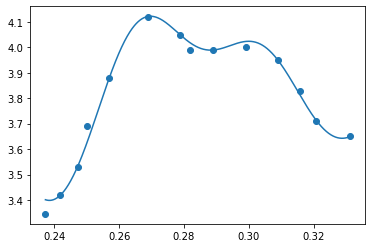

In [34]:
# Given data
data = {
    'SDS': ['0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11'],
    'Saline': ['0.2373', '0.2419', '0.2473', '0.2501', '0.257', '0.2689', '0.2789', '0.2819', '0.289', '0.299', '0.309', '0.3158', '0.3208', '0.3311'],
    'Viscosity': ['3.345', '3.42', '3.53', '3.69', '3.88', '4.12', '4.05', '3.99', '3.99', '4.0', '3.95', '3.83', '3.711', '3.65']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert columns to numeric types

df['SDS'] = pd.to_numeric(df['SDS'])
df['Saline'] = pd.to_numeric(df['Saline'])
df['Viscosity'] = pd.to_numeric(df['Viscosity'])

# Separate features and target variable
X = df[['SDS', 'Saline']]
y = df['Viscosity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but can improve SVR performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Regression (SVR)
svr_model = SVR()
# Hyperparameter tuning for SVR
param_grid_svr = {
    'C': [80, 0.01, 10],
    'epsilon': [0.001, 5, 0.02],
    'kernel': ['poly','rbf']
}
grid_svr = GridSearchCV(svr_model, param_grid_svr, cv=5)
grid_svr.fit(X_train_scaled, y_train)
svr_best_model = grid_svr.best_estimator_

# Evaluate the model on the test set
y_pred = svr_best_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
print(f"R-squared (test set): {r2_test}")
print(f"Mean Squared Error: {mse}")
# Predict new viscosity values for new data (e.g., different combinations of Temperature, SDS, and Saline)
new_data = pd.DataFrame({
    'SDS': [0.11],
    'Saline': [0.2967]
})

# Scale the new data using the same scaler used for training data
new_data_scaled = scaler.transform(new_data)

# Make predictions on new data
new_predictions = svr_best_model.predict(new_data_scaled)
print("Predicted viscosity values for new data:")
print(new_predictions)
# Convert new data to polynomial features
new_data_poly = scaler.transform(new_data)

# Make predictions on the new data
new_viscosity = svr_best_model.predict(new_data_poly)
print(f"Predicted new viscosity data: {new_viscosity}")

fit_line = np.arange(df.Saline.min(), df.Saline.max(), 0.0001)
new_df = pd.DataFrame({'Saline': fit_line})
data = {'Temperature': 300, 'SDS': 0.11}
new_df = new_df.assign(**data)
new_df_features = scaler.transform(new_df[['SDS', 'Saline']])
new_viscosity_2 = svr_best_model.predict(new_df_features)
plt.plot(new_df['Saline'], new_viscosity_2)
plt.scatter(df.Saline, df.Viscosity)
plt.show()

At 380K and SDS 0.18

R-squared (test set): 0.9336954478254007
Mean Squared Error: 0.0044261972162776995
Predicted viscosity values for new data:
[3.92904622]
Predicted new viscosity data: [3.92904622]


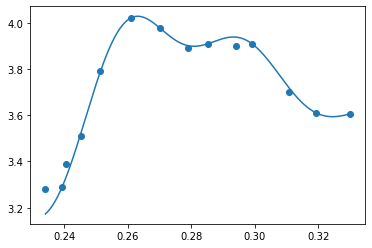

In [35]:
# Given data
data = {
    'SDS': ['0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11'],
    'Saline': ['0.2340', '0.2393', '0.2405', '0.2451', '0.2513', '0.2609', '0.2700', '0.2790', '0.2851', '0.294', '0.299', '0.3108', '0.3193', '0.3299'],
    'Viscosity': ['3.280', '3.29', '3.39', '3.51', '3.79', '4.02', '3.98', '3.89', '3.91', '3.90', '3.91', '3.70', '3.611', '3.605']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert columns to numeric types

df['SDS'] = pd.to_numeric(df['SDS'])
df['Saline'] = pd.to_numeric(df['Saline'])
df['Viscosity'] = pd.to_numeric(df['Viscosity'])

# Separate features and target variable
X = df[['SDS', 'Saline']]
y = df['Viscosity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but can improve SVR performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Regression (SVR)
svr_model = SVR()
# Hyperparameter tuning for SVR
param_grid_svr = {
    'C': [80, 0.01, 10],
    'epsilon': [0.001, 5, 0.02],
    'kernel': ['poly','rbf']
}
grid_svr = GridSearchCV(svr_model, param_grid_svr, cv=5)
grid_svr.fit(X_train_scaled, y_train)
svr_best_model = grid_svr.best_estimator_

# Evaluate the model on the test set
y_pred = svr_best_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
print(f"R-squared (test set): {r2_test}")
print(f"Mean Squared Error: {mse}")
# Predict new viscosity values for new data (e.g., different combinations of Temperature, SDS, and Saline)
new_data = pd.DataFrame({
    'SDS': [0.11],
    'Saline': [0.2967]
})

# Scale the new data using the same scaler used for training data
new_data_scaled = scaler.transform(new_data)

# Make predictions on new data
new_predictions = svr_best_model.predict(new_data_scaled)
print("Predicted viscosity values for new data:")
print(new_predictions)
# Convert new data to polynomial features
new_data_poly = scaler.transform(new_data)

# Make predictions on the new data
new_viscosity = svr_best_model.predict(new_data_poly)
print(f"Predicted new viscosity data: {new_viscosity}")

fit_line = np.arange(df.Saline.min(), df.Saline.max(), 0.0001)
new_df = pd.DataFrame({'Saline': fit_line})
data = {'Temperature': 300, 'SDS': 0.11}
new_df = new_df.assign(**data)
new_df_features = scaler.transform(new_df[['SDS', 'Saline']])
new_viscosity_2 = svr_best_model.predict(new_df_features)
plt.plot(new_df['Saline'], new_viscosity_2)
plt.scatter(df.Saline, df.Viscosity)
plt.show()

At 420K and SDS 0.18

R-squared (test set): 0.9803365054190455
Mean Squared Error: 0.0013126475049152757
Predicted viscosity values for new data:
[3.74508185]
Predicted new viscosity data: [3.74508185]


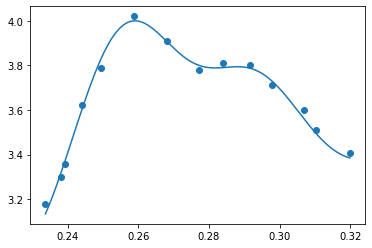

In [36]:
# Given data
data = {
    'SDS': ['0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11'],
    'Saline': ['0.2337', '0.2381', '0.2393', '0.2440', '0.2493', '0.2589', '0.2680', '0.2771', '0.2839', '0.2915', '0.2978', '0.3070', '0.3103', '0.3199'],
    'Viscosity': ['3.180', '3.2979', '3.36', '3.62', '3.79', '4.02', '3.91', '3.78', '3.81', '3.80', '3.71', '3.60', '3.511', '3.405']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert columns to numeric types

df['SDS'] = pd.to_numeric(df['SDS'])
df['Saline'] = pd.to_numeric(df['Saline'])
df['Viscosity'] = pd.to_numeric(df['Viscosity'])

# Separate features and target variable
X = df[['SDS', 'Saline']]
y = df['Viscosity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but can improve SVR performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Regression (SVR)
svr_model = SVR()
# Hyperparameter tuning for SVR
param_grid_svr = {
    'C': [80, 0.01, 10],
    'epsilon': [0.001, 5, 0.02],
    'kernel': ['poly','rbf']
}
grid_svr = GridSearchCV(svr_model, param_grid_svr, cv=5)
grid_svr.fit(X_train_scaled, y_train)
svr_best_model = grid_svr.best_estimator_

# Evaluate the model on the test set
y_pred = svr_best_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
print(f"R-squared (test set): {r2_test}")
print(f"Mean Squared Error: {mse}")
# Predict new viscosity values for new data (e.g., different combinations of Temperature, SDS, and Saline)
new_data = pd.DataFrame({
    'SDS': [0.11],
    'Saline': [0.2967]
})

# Scale the new data using the same scaler used for training data
new_data_scaled = scaler.transform(new_data)

# Make predictions on new data
new_predictions = svr_best_model.predict(new_data_scaled)
print("Predicted viscosity values for new data:")
print(new_predictions)
# Convert new data to polynomial features
new_data_poly = scaler.transform(new_data)

# Make predictions on the new data
new_viscosity = svr_best_model.predict(new_data_poly)
print(f"Predicted new viscosity data: {new_viscosity}")

fit_line = np.arange(df.Saline.min(), df.Saline.max(), 0.0001)
new_df = pd.DataFrame({'Saline': fit_line})
data = {'Temperature': 300, 'SDS': 0.11}
new_df = new_df.assign(**data)
new_df_features = scaler.transform(new_df[['SDS', 'Saline']])
new_viscosity_2 = svr_best_model.predict(new_df_features)
plt.plot(new_df['Saline'], new_viscosity_2)
plt.scatter(df.Saline, df.Viscosity)
plt.show()

At 460k and SDs 0.18

R-squared (test set): 0.9040393312897919
Mean Squared Error: 0.0016601408932796489
Predicted viscosity values for new data:
[3.19792471]
Predicted new viscosity data: [3.19792471]


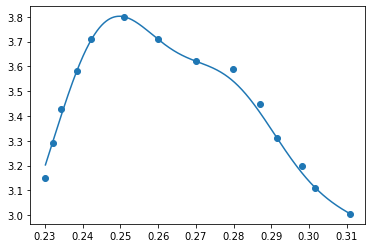

In [37]:
# Given data
data = {
    'SDS': ['0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11'],
    'Saline': ['0.2301', '0.2320', '0.2343', '0.2385', '0.2423', '0.2509', '0.2600', '0.2701', '0.2798', '0.2870', '0.2915', '0.2980', '0.3017', '0.3108'],
    'Viscosity': ['3.149', '3.2921', '3.43', '3.58', '3.71', '3.8', '3.71', '3.62', '3.59', '3.450', '3.31', '3.20', '3.111', '3.005']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert columns to numeric types

df['SDS'] = pd.to_numeric(df['SDS'])
df['Saline'] = pd.to_numeric(df['Saline'])
df['Viscosity'] = pd.to_numeric(df['Viscosity'])

# Separate features and target variable
X = df[['SDS', 'Saline']]
y = df['Viscosity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but can improve SVR performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Regression (SVR)
svr_model = SVR()
# Hyperparameter tuning for SVR
param_grid_svr = {
    'C': [80, 0.01, 10],
    'epsilon': [0.001, 5, 0.02],
    'kernel': ['poly','rbf']
}
grid_svr = GridSearchCV(svr_model, param_grid_svr, cv=5)
grid_svr.fit(X_train_scaled, y_train)
svr_best_model = grid_svr.best_estimator_

# Evaluate the model on the test set
y_pred = svr_best_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
print(f"R-squared (test set): {r2_test}")
print(f"Mean Squared Error: {mse}")
# Predict new viscosity values for new data (e.g., different combinations of Temperature, SDS, and Saline)
new_data = pd.DataFrame({
    'SDS': [0.11],
    'Saline': [0.2967]
})

# Scale the new data using the same scaler used for training data
new_data_scaled = scaler.transform(new_data)

# Make predictions on new data
new_predictions = svr_best_model.predict(new_data_scaled)
print("Predicted viscosity values for new data:")
print(new_predictions)
# Convert new data to polynomial features
new_data_poly = scaler.transform(new_data)

# Make predictions on the new data
new_viscosity = svr_best_model.predict(new_data_poly)
print(f"Predicted new viscosity data: {new_viscosity}")

fit_line = np.arange(df.Saline.min(), df.Saline.max(), 0.0001)
new_df = pd.DataFrame({'Saline': fit_line})
data = {'Temperature': 300, 'SDS': 0.11}
new_df = new_df.assign(**data)
new_df_features = scaler.transform(new_df[['SDS', 'Saline']])
new_viscosity_2 = svr_best_model.predict(new_df_features)
plt.plot(new_df['Saline'], new_viscosity_2)
plt.scatter(df.Saline, df.Viscosity)
plt.show()

At 300K and SDS 0.21

R-squared (test set): 0.9486760417104576
Mean Squared Error: 0.005352518583396047
Predicted viscosity values for new data:
[4.40284843]
Predicted new viscosity data: [4.40284843]


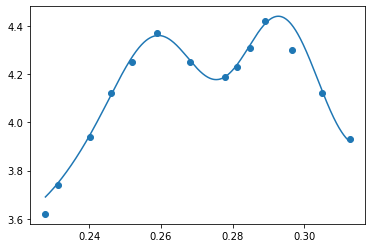

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

# Given data
data = {
    'Temperature': ['300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300'],
    'SDS': ['0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11'],
    'Saline': ['0.2278', '0.2314', '0.2401', '0.246', '0.252', '0.2588', '0.2681', '0.2778', '0.2813', '0.2849', '0.2891', '0.2965', '0.305', '0.3127'],
    'Viscosity': ['3.62', '3.74', '3.94', '4.12', '4.25', '4.37', '4.25', '4.19', '4.23', '4.31', '4.42', '4.3', '4.12', '3.93']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert columns to numeric types
df['Temperature'] = pd.to_numeric(df['Temperature'])
df['SDS'] = pd.to_numeric(df['SDS'])
df['Saline'] = pd.to_numeric(df['Saline'])
df['Viscosity'] = pd.to_numeric(df['Viscosity'])

# Separate features and target variable
X = df[['Temperature', 'SDS', 'Saline']]
y = df['Viscosity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but can improve SVR performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Regression (SVR)
svr_model = SVR()
# Hyperparameter tuning for SVR
param_grid_svr = {
    'C': [30, 0.01, 10],
    'epsilon': [0.01, 0.1, 0.05],
    'kernel': ['rbf']
}
grid_svr = GridSearchCV(svr_model, param_grid_svr, cv=5)
grid_svr.fit(X_train_scaled, y_train)
svr_best_model = grid_svr.best_estimator_

# Evaluate the model on the test set
y_pred = svr_best_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
print(f"R-squared (test set): {r2_test}")
print(f"Mean Squared Error: {mse}")
# Predict new viscosity values for new data (e.g., different combinations of Temperature, SDS, and Saline)
new_data = pd.DataFrame({
    'Temperature': [300],
    'SDS': [0.11],
    'Saline': [0.2966]
})

# Scale the new data using the same scaler used for training data
new_data_scaled = scaler.transform(new_data)

# Make predictions on new data
new_predictions = svr_best_model.predict(new_data_scaled)
print("Predicted viscosity values for new data:")
print(new_predictions)
# Convert new data to polynomial features
new_data_poly = scaler.transform(new_data)

# Make predictions on the new data
new_viscosity = svr_best_model.predict(new_data_poly)
print(f"Predicted new viscosity data: {new_viscosity}")

fit_line = np.arange(df.Saline.min(), df.Saline.max(), 0.0001)
new_df = pd.DataFrame({'Saline': fit_line})
data = {'Temperature': 300, 'SDS': 0.11}
new_df = new_df.assign(**data)
new_df_features = scaler.transform(new_df[['Temperature', 'SDS', 'Saline']])
new_viscosity_2 = svr_best_model.predict(new_df_features)
plt.plot(new_df['Saline'], new_viscosity_2)
plt.scatter(df.Saline, df.Viscosity)
plt.show()

At 340K and SDS 0.21

R-squared (test set): 0.9880342435562341
Mean Squared Error: 0.0009750761973175455
Predicted viscosity values for new data:
[4.1883774]
Predicted new viscosity data: [4.1883774]


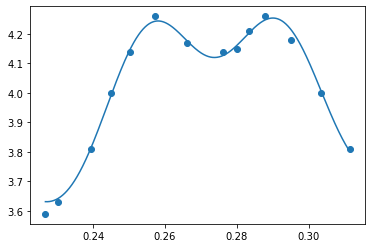

In [39]:
# Given data
data = {
    
    'SDS': ['0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21'],
    'Saline': ['0.2267', '0.2303', '0.2395', '0.2449', '0.2503', '0.2571', '0.2661', '0.2761', '0.2800', '0.2833', '0.2879', '0.2951', '0.3034', '0.3115'],
    'Viscosity': ['3.59', '3.63', '3.81', '4.00', '4.14', '4.26', '4.17', '4.14', '4.15', '4.21', '4.26', '4.18', '4.001', '3.81']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert columns to numeric types

df['SDS'] = pd.to_numeric(df['SDS'])
df['Saline'] = pd.to_numeric(df['Saline'])
df['Viscosity'] = pd.to_numeric(df['Viscosity'])

# Separate features and target variable
X = df[['SDS', 'Saline']]
y = df['Viscosity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but can improve SVR performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Regression (SVR)
svr_model = SVR()
# Hyperparameter tuning for SVR
param_grid_svr = {
    'C': [60, 0.01, 20],
    'epsilon': [0.01, 0.1, 0.4],
    'kernel': ['rbf']
}
grid_svr = GridSearchCV(svr_model, param_grid_svr, cv=5)
grid_svr.fit(X_train_scaled, y_train)
svr_best_model = grid_svr.best_estimator_

# Evaluate the model on the test set
y_pred = svr_best_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
print(f"R-squared (test set): {r2_test}")
print(f"Mean Squared Error: {mse}")
# Predict new viscosity values for new data (e.g., different combinations of Temperature, SDS, and Saline)
new_data = pd.DataFrame({
    
    'SDS': [0.11],
    'Saline': [0.2966]
})

# Scale the new data using the same scaler used for training data
new_data_scaled = scaler.transform(new_data)

# Make predictions on new data
new_predictions = svr_best_model.predict(new_data_scaled)
print("Predicted viscosity values for new data:")
print(new_predictions)
# Convert new data to polynomial features
new_data_poly = scaler.transform(new_data)

# Make predictions on the new data
new_viscosity = svr_best_model.predict(new_data_poly)
print(f"Predicted new viscosity data: {new_viscosity}")

fit_line = np.arange(df.Saline.min(), df.Saline.max(), 0.0001)
new_df = pd.DataFrame({'Saline': fit_line})
data = {'Temperature': 300, 'SDS': 0.11}
new_df = new_df.assign(**data)
new_df_features = scaler.transform(new_df[['SDS', 'Saline']])
new_viscosity_2 = svr_best_model.predict(new_df_features)
plt.plot(new_df['Saline'], new_viscosity_2)
plt.scatter(df.Saline, df.Viscosity)
plt.show()


At 380K and SDS 0.21

R-squared (test set): 0.9800429909309538
Mean Squared Error: 0.0018480190397936718
Predicted viscosity values for new data:
[4.05428076]
Predicted new viscosity data: [4.05428076]


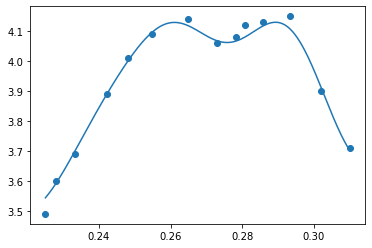

In [40]:
# Given data
data = {
    
    'SDS': ['0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21'],
    'Saline': ['0.2251', '0.2281', '0.2334', '0.2423', '0.2480', '0.2549', '0.2648', '0.2730', '0.2783', '0.2807', '0.2858', '0.2933', '0.3021', '0.3100'],
    'Viscosity': ['3.490', '3.600', '3.690', '3.890', '4.01', '4.09', '4.14', '4.06', '4.08', '4.12', '4.13', '4.15', '3.90', '3.71']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert columns to numeric types

df['SDS'] = pd.to_numeric(df['SDS'])
df['Saline'] = pd.to_numeric(df['Saline'])
df['Viscosity'] = pd.to_numeric(df['Viscosity'])

# Separate features and target variable
X = df[['SDS', 'Saline']]
y = df['Viscosity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but can improve SVR performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Regression (SVR)
svr_model = SVR()
# Hyperparameter tuning for SVR
param_grid_svr = {
    'C': [60, 0.01, 20],
    'epsilon': [0.01, 0.1, 0.4],
    'kernel': ['rbf']
}
grid_svr = GridSearchCV(svr_model, param_grid_svr, cv=5)
grid_svr.fit(X_train_scaled, y_train)
svr_best_model = grid_svr.best_estimator_

# Evaluate the model on the test set
y_pred = svr_best_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
print(f"R-squared (test set): {r2_test}")
print(f"Mean Squared Error: {mse}")
# Predict new viscosity values for new data (e.g., different combinations of Temperature, SDS, and Saline)
new_data = pd.DataFrame({
    
    'SDS': [0.11],
    'Saline': [0.2966]
})

# Scale the new data using the same scaler used for training data
new_data_scaled = scaler.transform(new_data)

# Make predictions on new data
new_predictions = svr_best_model.predict(new_data_scaled)
print("Predicted viscosity values for new data:")
print(new_predictions)
# Convert new data to polynomial features
new_data_poly = scaler.transform(new_data)

# Make predictions on the new data
new_viscosity = svr_best_model.predict(new_data_poly)
print(f"Predicted new viscosity data: {new_viscosity}")

fit_line = np.arange(df.Saline.min(), df.Saline.max(), 0.0001)
new_df = pd.DataFrame({'Saline': fit_line})
data = {'Temperature': 300, 'SDS': 0.11}
new_df = new_df.assign(**data)
new_df_features = scaler.transform(new_df[['SDS', 'Saline']])
new_viscosity_2 = svr_best_model.predict(new_df_features)
plt.plot(new_df['Saline'], new_viscosity_2)
plt.scatter(df.Saline, df.Viscosity)
plt.show()

At 420K and SDS 0.21

R-squared (test set): 0.9879731419397653
Mean Squared Error: 0.0008685395995832868
Predicted viscosity values for new data:
[3.92914436]
Predicted new viscosity data: [3.92914436]


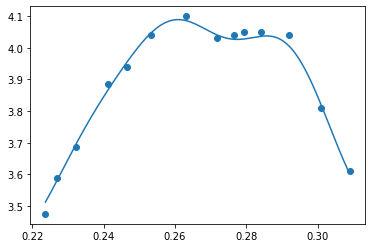

In [41]:
# Given data
data = {
    
    'SDS': ['0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21'],
    'Saline': ['0.2237', '0.2269', '0.2323', '0.2411', '0.2467', '0.2533', '0.2632', '0.2718', '0.2766', '0.2793', '0.2841', '0.2920', '0.3010', '0.3090'],
    'Viscosity': ['3.4750', '3.5880', '3.6860', '3.8870', '3.94', '4.04', '4.1', '4.03', '4.04', '4.05', '4.05', '4.04', '3.81', '3.61']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert columns to numeric types

df['SDS'] = pd.to_numeric(df['SDS'])
df['Saline'] = pd.to_numeric(df['Saline'])
df['Viscosity'] = pd.to_numeric(df['Viscosity'])

# Separate features and target variable
X = df[['SDS', 'Saline']]
y = df['Viscosity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but can improve SVR performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Regression (SVR)
svr_model = SVR()
# Hyperparameter tuning for SVR
param_grid_svr = {
    'C': [60, 0.01, 20],
    'epsilon': [0.01, 0.1, 0.4],
    'kernel': ['rbf']
}
grid_svr = GridSearchCV(svr_model, param_grid_svr, cv=5)
grid_svr.fit(X_train_scaled, y_train)
svr_best_model = grid_svr.best_estimator_

# Evaluate the model on the test set
y_pred = svr_best_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
print(f"R-squared (test set): {r2_test}")
print(f"Mean Squared Error: {mse}")
# Predict new viscosity values for new data (e.g., different combinations of Temperature, SDS, and Saline)
new_data = pd.DataFrame({
    
    'SDS': [0.11],
    'Saline': [0.2966]
})

# Scale the new data using the same scaler used for training data
new_data_scaled = scaler.transform(new_data)

# Make predictions on new data
new_predictions = svr_best_model.predict(new_data_scaled)
print("Predicted viscosity values for new data:")
print(new_predictions)
# Convert new data to polynomial features
new_data_poly = scaler.transform(new_data)

# Make predictions on the new data
new_viscosity = svr_best_model.predict(new_data_poly)
print(f"Predicted new viscosity data: {new_viscosity}")

fit_line = np.arange(df.Saline.min(), df.Saline.max(), 0.0001)
new_df = pd.DataFrame({'Saline': fit_line})
data = {'Temperature': 300, 'SDS': 0.11}
new_df = new_df.assign(**data)
new_df_features = scaler.transform(new_df[['SDS', 'Saline']])
new_viscosity_2 = svr_best_model.predict(new_df_features)
plt.plot(new_df['Saline'], new_viscosity_2)
plt.scatter(df.Saline, df.Viscosity)
plt.show()

At 460K and SDS 0.21

R-squared (test set): 0.987725503043773
Mean Squared Error: 0.0006239934464749884
Predicted viscosity values for new data:
[3.54793377]
Predicted new viscosity data: [3.54793377]


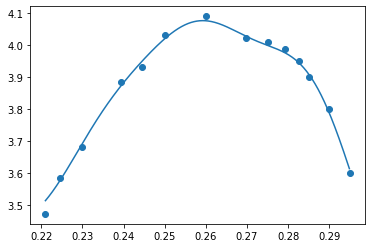

In [42]:
# Given data
data = {
    
    'SDS': ['0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21', '0.21'],
    'Saline': ['0.2210', '0.2245', '0.2300', '0.2393', '0.2445', '0.2500', '0.2601', '0.2698', '0.2750', '0.2793', '0.2827', '0.2850', '0.290', '0.295'],
    'Viscosity': ['3.4731', '3.5862', '3.6839', '3.8849', '3.9330', '4.0339', '4.0913', '4.0220', '4.0100', '3.99', '3.95', '3.9000', '3.8005', '3.6000']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert columns to numeric types

df['SDS'] = pd.to_numeric(df['SDS'])
df['Saline'] = pd.to_numeric(df['Saline'])
df['Viscosity'] = pd.to_numeric(df['Viscosity'])

# Separate features and target variable
X = df[['SDS', 'Saline']]
y = df['Viscosity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but can improve SVR performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Regression (SVR)
svr_model = SVR()
# Hyperparameter tuning for SVR
param_grid_svr = {
    'C': [60, 0.01, 20],
    'epsilon': [0.01, 0.1, 0.4],
    'kernel': ['rbf']
}
grid_svr = GridSearchCV(svr_model, param_grid_svr, cv=5)
grid_svr.fit(X_train_scaled, y_train)
svr_best_model = grid_svr.best_estimator_

# Evaluate the model on the test set
y_pred = svr_best_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
print(f"R-squared (test set): {r2_test}")
print(f"Mean Squared Error: {mse}")
# Predict new viscosity values for new data (e.g., different combinations of Temperature, SDS, and Saline)
new_data = pd.DataFrame({
    
    'SDS': [0.11],
    'Saline': [0.2966]
})

# Scale the new data using the same scaler used for training data
new_data_scaled = scaler.transform(new_data)

# Make predictions on new data
new_predictions = svr_best_model.predict(new_data_scaled)
print("Predicted viscosity values for new data:")
print(new_predictions)
# Convert new data to polynomial features
new_data_poly = scaler.transform(new_data)

# Make predictions on the new data
new_viscosity = svr_best_model.predict(new_data_poly)
print(f"Predicted new viscosity data: {new_viscosity}")

fit_line = np.arange(df.Saline.min(), df.Saline.max(), 0.0001)
new_df = pd.DataFrame({'Saline': fit_line})
data = {'Temperature': 300, 'SDS': 0.11}
new_df = new_df.assign(**data)
new_df_features = scaler.transform(new_df[['SDS', 'Saline']])
new_viscosity_2 = svr_best_model.predict(new_df_features)
plt.plot(new_df['Saline'], new_viscosity_2)
plt.scatter(df.Saline, df.Viscosity)
plt.show()

At 300K and SDS 0.24

R-squared (test set): 0.9771700105129614
Mean Squared Error: 0.0015529466182183386
Predicted viscosity values for new data:
[4.35430873]
Predicted new viscosity data: [4.35430873]


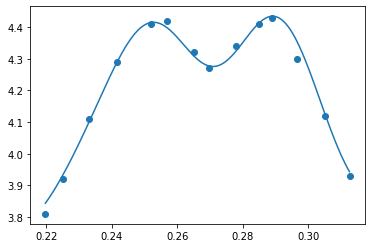

In [43]:


# Given data
data = {
    'Temperature': ['300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300'],
    'SDS': ['0.24', '0.24', '0.24', '0.24', '0.24', '0.24', '0.24', '0.24', '0.24', '0.24', '0.24', '0.24', '0.24', '0.24'],
    'Saline': ['0.2198', '0.2251', '0.2331', '0.2416', '0.252', '0.2568', '0.2651', '0.2697', '0.2781', '0.2849', '0.2891', '0.2965', '0.305', '0.3127'],
    'Viscosity': ['3.81', '3.92', '4.11', '4.29', '4.41', '4.42', '4.32', '4.27', '4.34', '4.41', '4.43', '4.3', '4.12', '3.93']
}
#Viscosity': ['3.81', '3.92', '4.11', '4.29', '4.41', '4.42', '4.32', '4.27', '4.34', '4.41', '4.43', '4.3', '4.12', '3.93']
# Create a DataFrame
df = pd.DataFrame(data)

# Convert columns to numeric types
df['Temperature'] = pd.to_numeric(df['Temperature'])
df['SDS'] = pd.to_numeric(df['SDS'])
df['Saline'] = pd.to_numeric(df['Saline'])
df['Viscosity'] = pd.to_numeric(df['Viscosity'])

# Separate features and target variable
X = df[['Temperature', 'SDS', 'Saline']]
y = df['Viscosity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but can improve SVR performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Regression (SVR)
svr_model = SVR()
# Hyperparameter tuning for SVR
param_grid_svr = {
    'C': [30, 0.01, 10],
    'epsilon': [0.01, 0.1, 0.05],
    'kernel': ['rbf']
}
grid_svr = GridSearchCV(svr_model, param_grid_svr, cv=5)
grid_svr.fit(X_train_scaled, y_train)
svr_best_model = grid_svr.best_estimator_

# Evaluate the model on the test set
y_pred = svr_best_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
print(f"R-squared (test set): {r2_test}")
print(f"Mean Squared Error: {mse}")
# Predict new viscosity values for new data (e.g., different combinations of Temperature, SDS, and Saline)
new_data = pd.DataFrame({
    'Temperature': [300],
    'SDS': [0.11],
    'Saline': [0.2966]
})

# Scale the new data using the same scaler used for training data
new_data_scaled = scaler.transform(new_data)

# Make predictions on new data
new_predictions = svr_best_model.predict(new_data_scaled)
print("Predicted viscosity values for new data:")
print(new_predictions)
# Convert new data to polynomial features
new_data_poly = scaler.transform(new_data)

# Make predictions on the new data
new_viscosity = svr_best_model.predict(new_data_poly)
print(f"Predicted new viscosity data: {new_viscosity}")

fit_line = np.arange(df.Saline.min(), df.Saline.max(), 0.0001)
new_df = pd.DataFrame({'Saline': fit_line})
data = {'Temperature': 300, 'SDS': 0.11}
new_df = new_df.assign(**data)
new_df_features = scaler.transform(new_df[['Temperature', 'SDS', 'Saline']])
new_viscosity_2 = svr_best_model.predict(new_df_features)
plt.plot(new_df['Saline'], new_viscosity_2)
plt.scatter(df.Saline, df.Viscosity)
plt.show()

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

# Given data
data = {
    'Temperature': ['300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300', '300'],
    'SDS': ['0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11'],
    'Saline': ['0.2437', '0.2509', '0.2599', '0.2687', '0.2759', '0.2832', '0.2966', '0.3077', '0.3161', '0.327', '0.3288', '0.336', '0.3378', '0.3421'],
    'Viscosity': ['3.07', '3.19', '3.53', '3.71', '3.93', '3.99', '3.82', '3.76', '3.89', '3.77', '3.63', '3.48', '3.311', '3.2']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert columns to numeric types
df['Temperature'] = pd.to_numeric(df['Temperature'])
df['SDS'] = pd.to_numeric(df['SDS'])
df['Saline'] = pd.to_numeric(df['Saline'])
df['Viscosity'] = pd.to_numeric(df['Viscosity'])

# Separate features and target variable
X = df[['Temperature', 'SDS', 'Saline']]
y = df['Viscosity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but can improve LightGBM performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LightGBM Regression
lgbm_model = LGBMRegressor()
# Hyperparameter tuning for LightGBM
param_grid_lgbm = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}
grid_lgbm = GridSearchCV(lgbm_model, param_grid_lgbm, cv=5)
grid_lgbm.fit(X_train_scaled, y_train)
lgbm_best_model = grid_lgbm.best_estimator_

# Evaluate the model on the test set
y_pred = lgbm_best_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
print(f"R-squared (test set): {r2_test}")
print(f"Mean Squared Error: {mse}")

# Predict new viscosity values for new data (e.g., different combinations of Temperature, SDS, and Saline)
new_data = pd.DataFrame({
    'Temperature': [300],
    'SDS': [0.11],
    'Saline': [0.36]
})

# Scale the new data using the same scaler used for training data
new_data_scaled = scaler.transform(new_data)

# Make predictions on new data
new_predictions = lgbm_best_model.predict(new_data_scaled)
print("Predicted viscosity values for new data:")
print(new_predictions)

fit_line = np.arange(df.Saline.min(), df.Saline.max(), 0.0001)
new_df = pd.DataFrame({'Saline': fit_line})
data = {'Temperature': 300, 'SDS': 0.11}
new_df = new_df.assign(**data)
new_df_features = scaler.transform(new_df[['Temperature', 'SDS', 'Saline']])
new_viscosity_2 = lgbm_best_model.predict(new_df_features)
plt.plot(new_df['Saline'], new_viscosity_2)
plt.scatter(df.Saline, df.Viscosity)
plt.show()

ModuleNotFoundError: No module named 'lightgbm'